# 1. Import libraries

In [1]:
# Data wranggling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Import and read the data

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
ss = pd.read_csv('titanic/gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
# get the shapes
train.shape, test.shape

((891, 12), (418, 11))

In [7]:
ss.shape

(418, 2)

In [8]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 3. Data description

* survival: Survival	            [0 = No, 1 = Yes]
* pclass: Ticket class	        [1 = 1st, 2 = 2nd, 3 = 3rd]
* sex: Sex	
* Age: Age in years	
* sibsp: # of siblings / spouses aboard the Titanic	
* parch: # of parents / children aboard the Titanic	
* ticket: Ticket number	
* fare: Passenger fare	
* cabin: Cabin number	
* embarked: Port of Embarkation    [C = Cherbourg, Q = Queenstown, S = Southampton]

# 4. Exploratory data analysis (EDA)

## 4.1 Data types, missing data and summary statistics

In [9]:
# get the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# get numbers of missing data in the train set, sort the values going form highest to lowest
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
# get the numbers of missing data in the test sort the values goind from highest to lowest
test.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

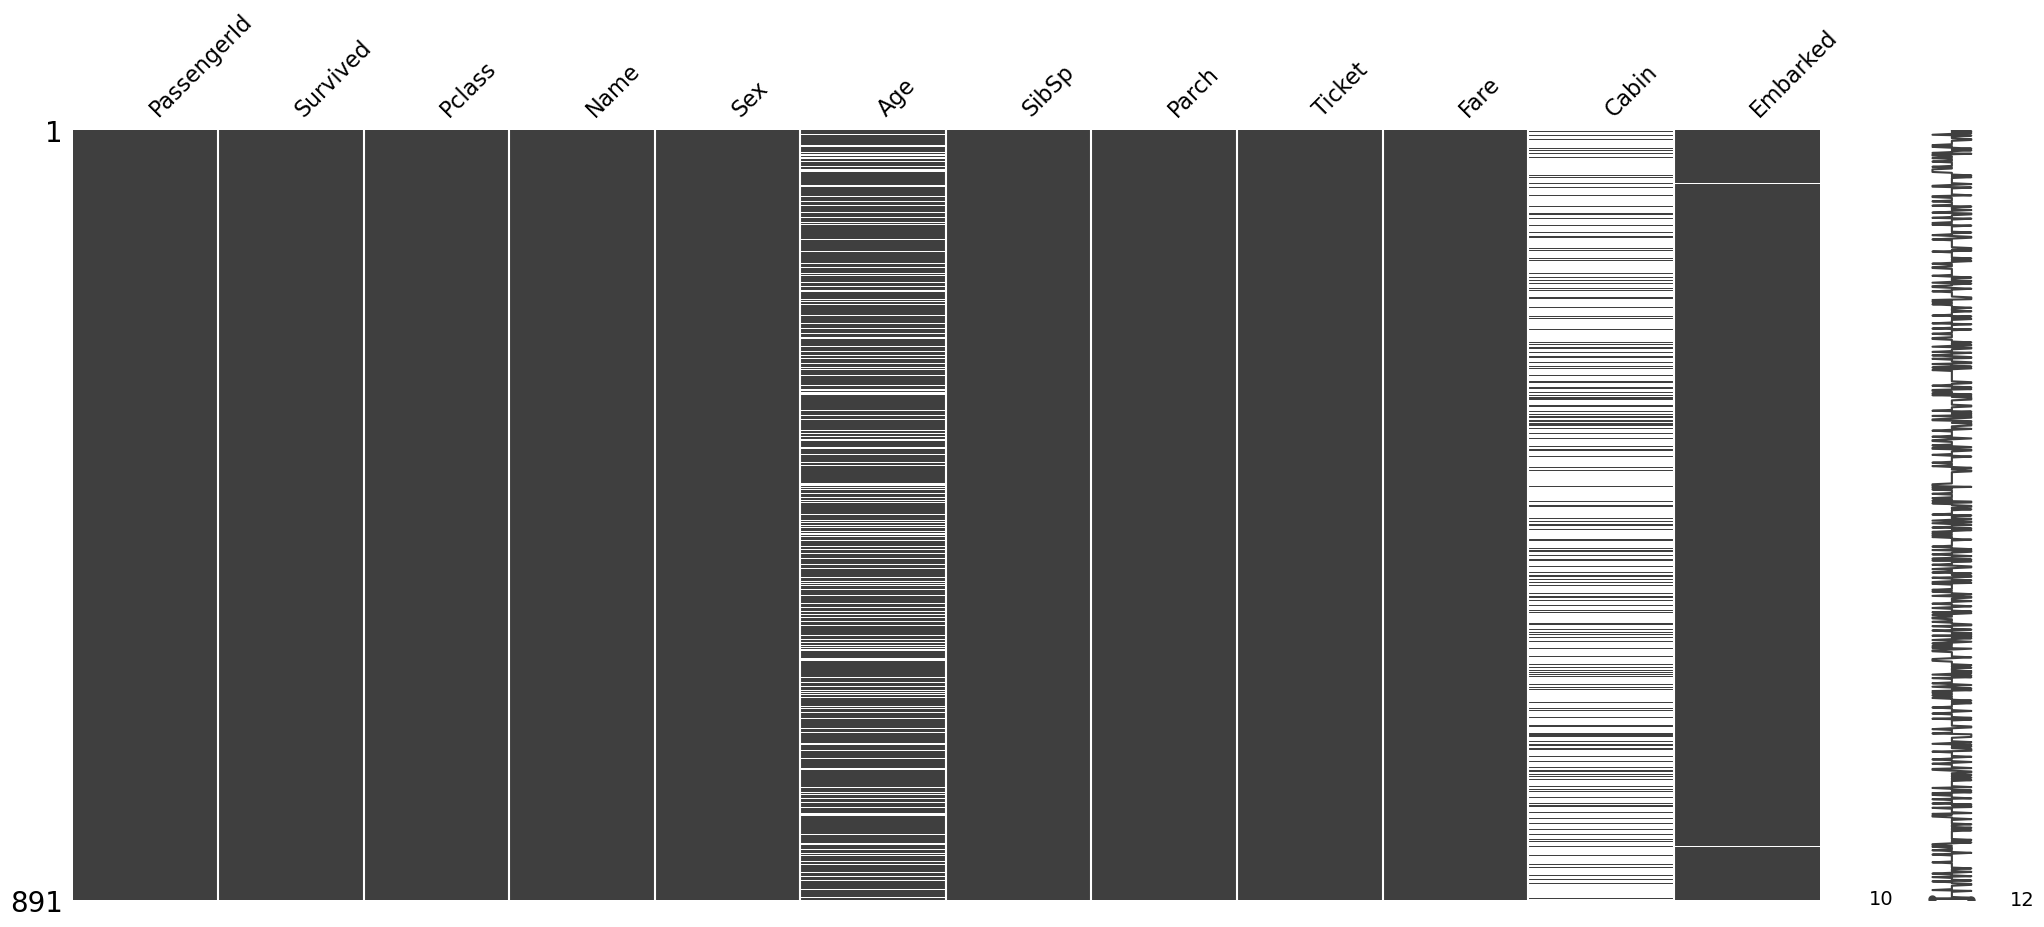

In [12]:
# visualize by missingno (train set)
missingno.matrix(train);

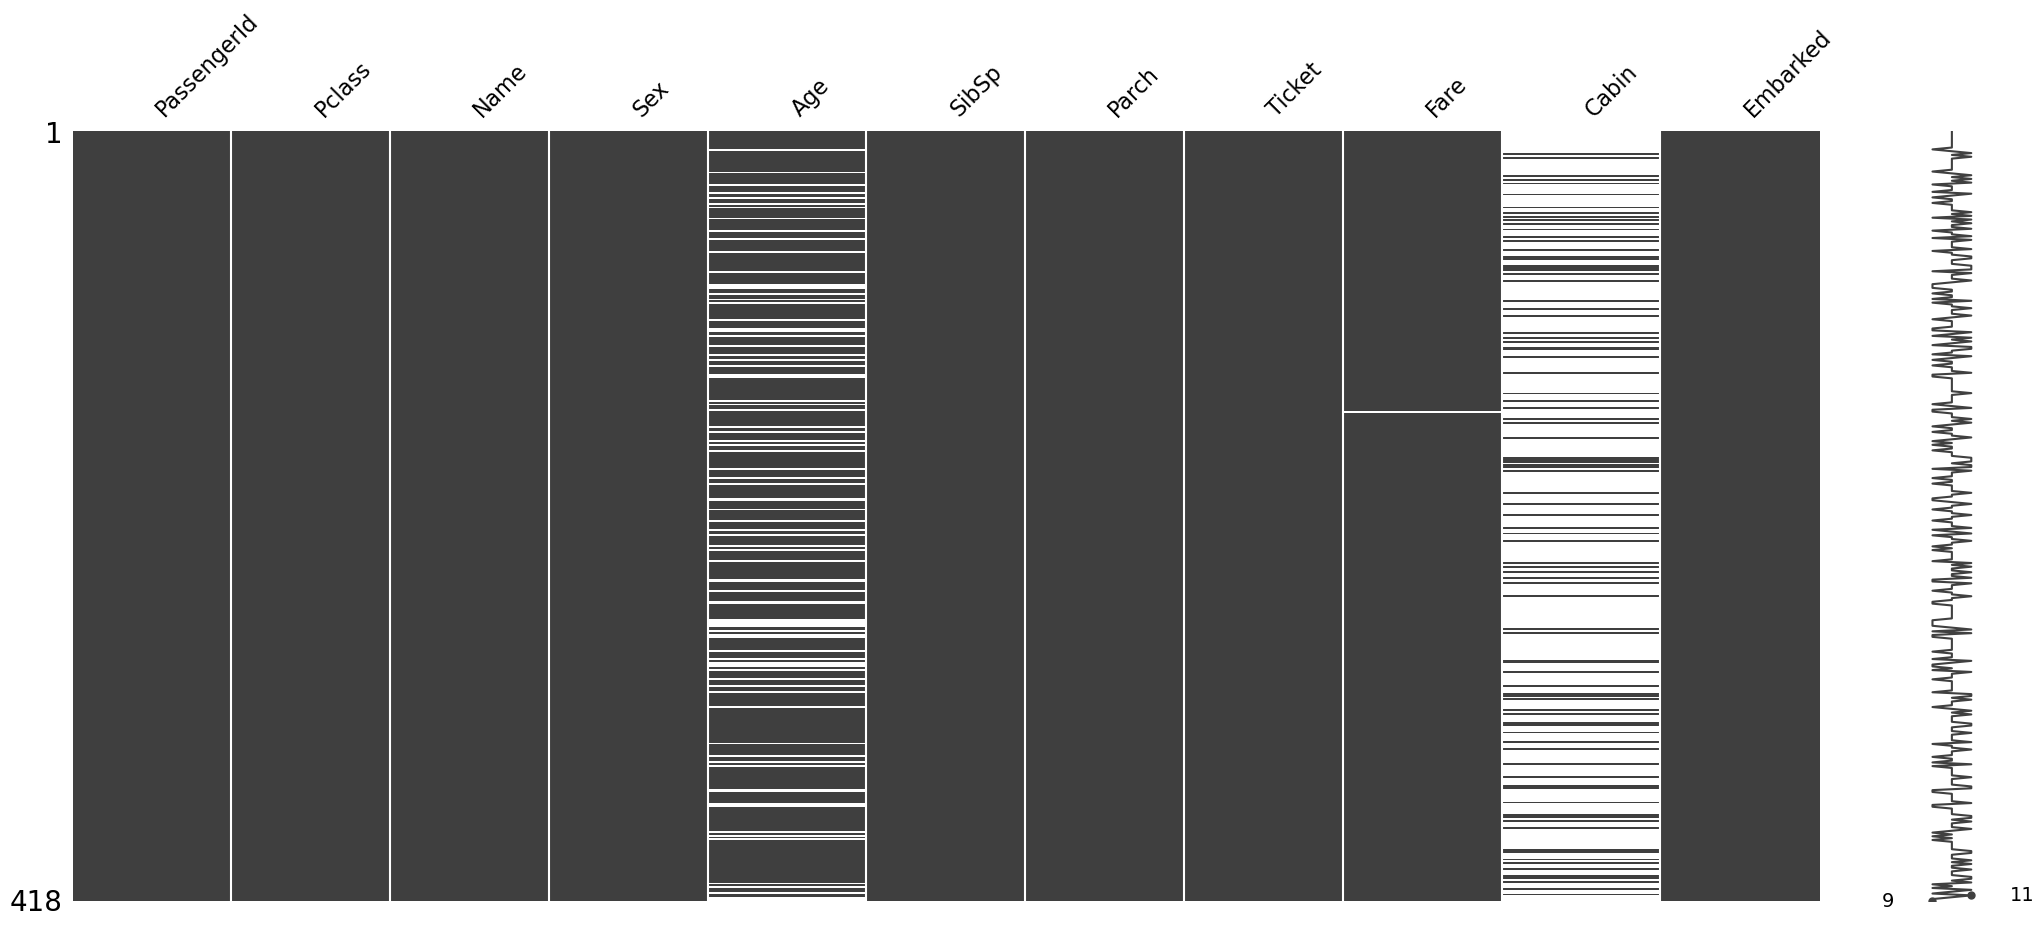

In [13]:
# visualise by missingno (test set)
missingno.matrix(test);

In [14]:
# get the summary statistics (train set)
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# get the summary statistics (test set)
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 4.2 Feature analysis

### 4.2.1 Categorical variables

### Categorical variable: Sex

In [16]:
train['Sex'].value_counts(dropna=False)    # male > female

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
test['Sex'].value_counts(dropna=False)     # male > female

Sex
male      266
female    152
Name: count, dtype: int64

In [18]:
# get the survival rate (mean) by sex
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)    
# Note: females had higher chances of survivial 👇🏻

,Sex,Survived
0,female,0.742038
1,male,0.188908


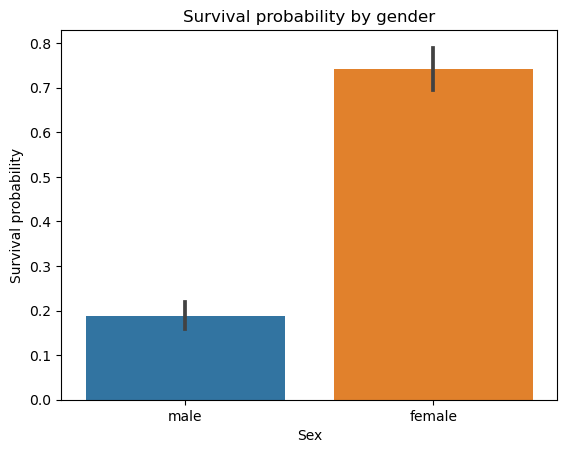

In [19]:
# get the plot of the survival rate by sex
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival probability by gender')
plt.ylabel('Survival probability');

### Categorical variable: Pclass - Ticket class

In [20]:
train['Pclass'].value_counts(dropna=False)
# Note: 3rd class had more passengers

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [21]:
test['Pclass'].value_counts(dropna=False)

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [22]:
# get the survival rate (mean) by Pclass
train[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

# Note: 1st class passenger had the highest chances of survival, with 3rd class as the lowest

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


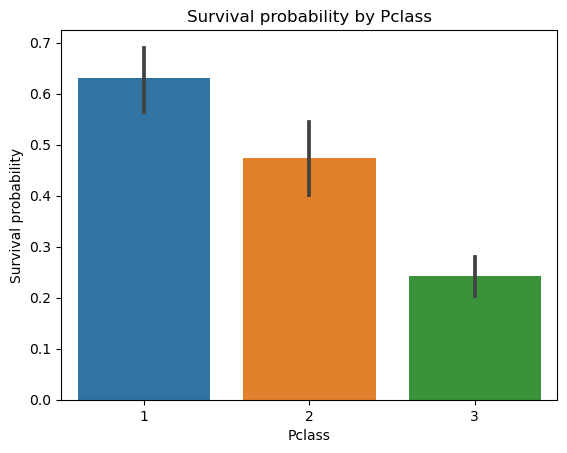

In [23]:
# get the plot of the survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train)
plt.ylabel('Survival probability')
plt.title('Survival probability by Pclass');

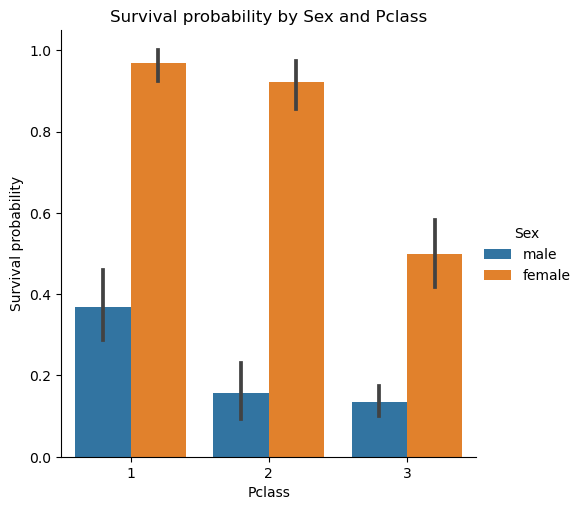

In [24]:
# get the survival probability by gender and passenger class
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar')
plt.ylabel('Survival probability')
plt.title('Survival probability by Sex and Pclass');

### Categorical variable: Embarked (boarded from which city/station)

In [25]:
train['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [26]:
test['Embarked'].value_counts(dropna=False)

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [27]:
# get the survival rate (mean) by embarkment
train[['Embarked', 'Survived']].groupby('Embarked', as_index=False, ).mean().sort_values(by='Survived', ascending=False)

# Note: The people who had boarder from Cherbourg(C), had higher chances of survival

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


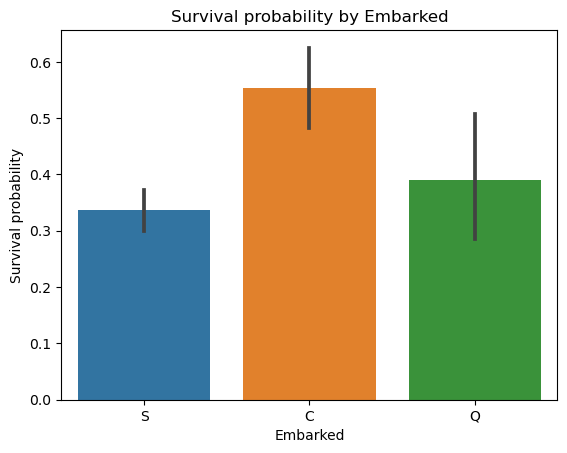

In [28]:
# get the survival plot by emabarkment
sns.barplot(x='Embarked', y='Survived', data=train)
plt.ylabel('Survival probability')
plt.title('Survival probability by Embarked');

By observing the trends so far, we've concluded that female passengers had higher chance of survival, followed by the passenger class,
where the passengers with first class ticked survived more. The trends also depict the fact that those who had embarked from Cherbourg
survived more.

A hypothesis that arises make us to focus on the fact that passenger with embarkment from Cherbourg had first class ticket making their
survival probability more. The rich factor might have saved them, making the poor passengers with third class ticket deprived of getting 
the safety services first as compared to the passengers with first class ticket.

Let's test this hypothesis!

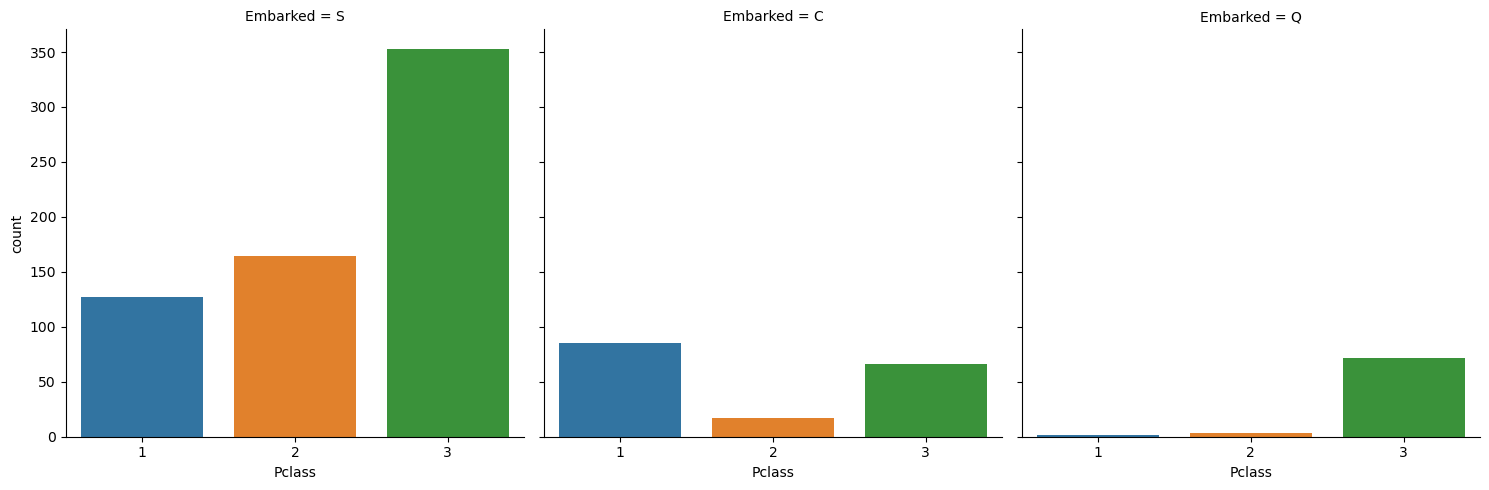

In [29]:
sns.catplot(
    x='Pclass',
    col='Embarked',
    data=train,
    kind='count'
);

### 4.2.2 Numerical variables

Numerical variables in the dataset: SibSp, Parch, Age, Fare

### Detect and remove outliers in numerical variables

Outliers in numerical variables are data points that significantly differ from the rest of the data in a dataset. They are observations that lie outside the typical range of values and may skew statistical analyses, such as means, standard deviations, and correlations. Outliers can occur due to various reasons, including measurement errors, natural variability in the data, or genuine anomalies in the phenomenon being studied.

We'll use the `Percentile method` for getting the outliers.

In [30]:
def detect_outliers(df, n, features):
    '''
    This function detects and remove outliers from a dataframe
    '''
    outlier_indices = []

    for col in features:
        # calculate percentiles
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        # calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        # define the range
        outlier_step = 1.5 * IQR
        # detect the indices with outliers
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    # list containing the indices of the rows in the dataframe df that are identified as outliers in multiple features
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)

    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['SibSp', 'Parch', 'Age', 'Fare'])
print(f'We will drop these {len(outliers_to_drop)} indicies: {outliers_to_drop}')

We will drop these 10 indicies: [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [31]:
# outliers in train set
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [32]:
# drop the outliers
print(f'Before: {len(train)} rows')

train = train.drop(outliers_to_drop, axis=0).reset_index(drop=True)

print(f'After: {len(train)} rows')

Before: 891 rows
After: 881 rows


### Numerical variables correlation with survival

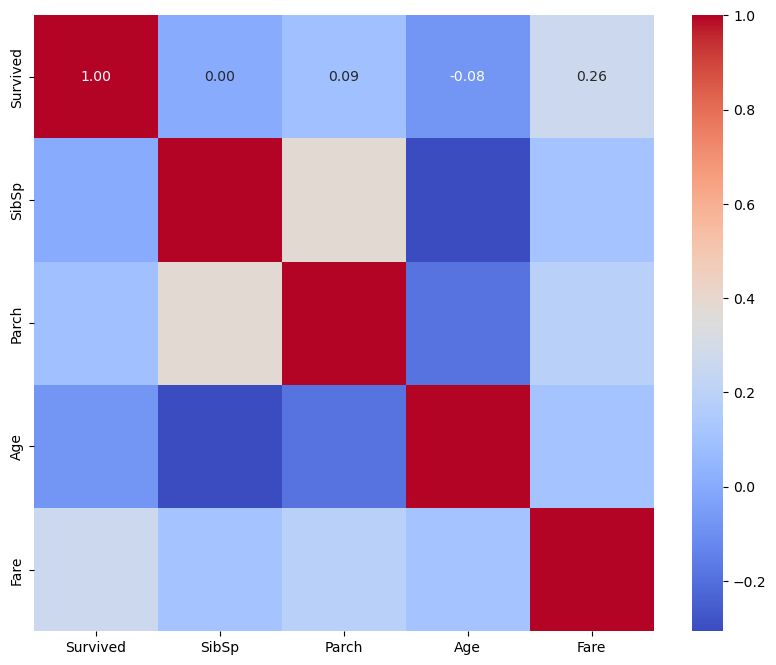

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10});

### Numerical variable: SibSp

In [34]:
train['SibSp'].value_counts(dropna=False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [35]:
# get the survival rate (mean) by SibSp
train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

# Note: passengers with 1 sibling had higher chances of survival

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


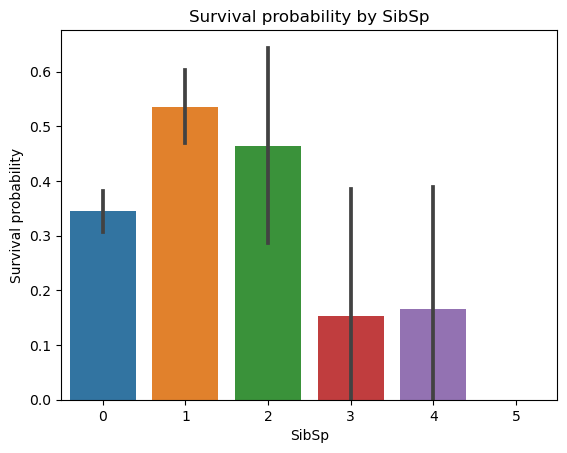

In [36]:
# get the survival plot by SibSp
sns.barplot(x='SibSp', y='Survived', data=train)
plt.ylabel('Survival probability')
plt.title('Survival probability by SibSp');

### Numerical variable: Parch

In [37]:
train['Parch'].value_counts(dropna=False)

Parch
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [38]:
# get the survival rate (mean) by Parch
train[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

# Note: passengers with 3 parents had more chances of survival

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


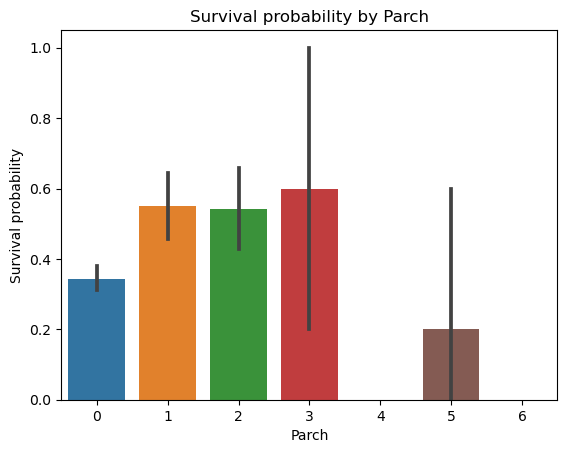

In [39]:
# get the survival plot by Parch
sns.barplot(x='Parch', y='Survived', data=train)
plt.title('Survival probability by Parch')
plt.ylabel('Survival probability');

### Numerical variable: Age

In [40]:
train['Age'].value_counts(dropna=False)

Age
NaN      170
24.00     29
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [41]:
# get the survival rate (mean) by Age
train[['Age', 'Survived']].groupby('Age', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


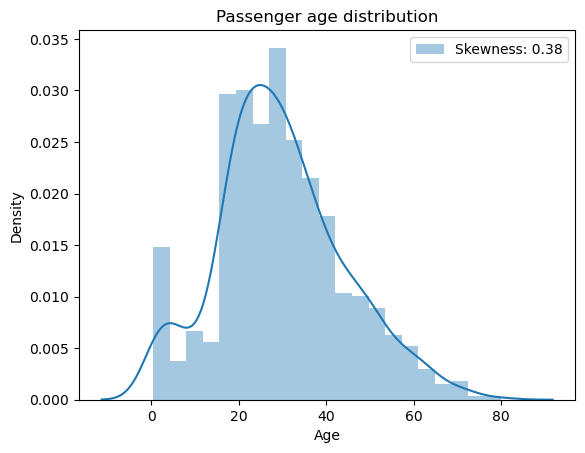

In [42]:
# get the survival plot by Age
sns.distplot(train['Age'], label=f"Skewness: {round(train['Age'].skew(), 2)}")
plt.legend(loc='best')
plt.title('Passenger age distribution');

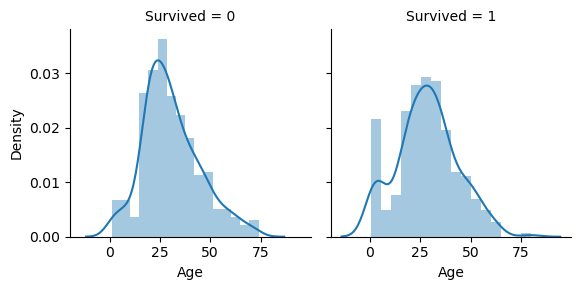

In [43]:
# Age distribution by survival
sns.FacetGrid(train, col='Survived').map(sns.distplot, 'Age');

# Note: Passengers who were younger had more chances of survival

### Numerical variable: Fare

In [44]:
train['Fare'].value_counts(dropna=False)

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
6.8583      1
12.6500     1
8.6542      1
12.0000     1
10.5167     1
Name: count, Length: 247, dtype: int64

In [45]:
# get the survival rate (mean) by Fare
train[['Fare', 'Survived']].groupby('Fare', as_index=False).mean().sort_values('Survived', ascending=False)

,Fare,Survived
246,512.3292,1.0
188,52.5542,1.0
173,39.4000,1.0
81,12.4750,1.0
79,12.2875,1.0
...,...,...
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0
76,11.5000,0.0


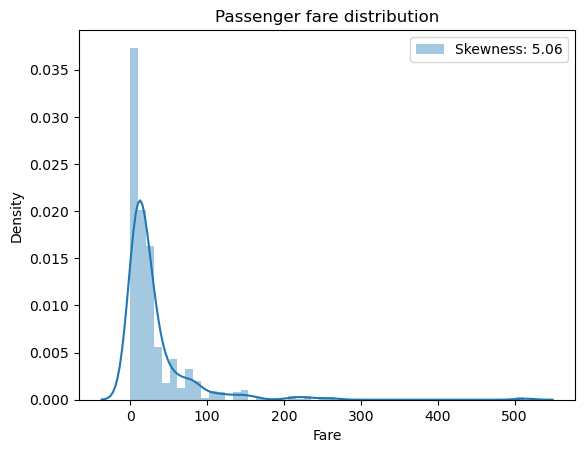

In [46]:
# get the survival plot by Fare
sns.distplot(train['Fare'], label=f"Skewness: {round(train['Fare'].skew(), 2)}")
plt.legend(loc='best')
plt.title('Passenger fare distribution');

# Note: high skewness, this will be addressed in the data transformation phase

# 5. Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training.

* Drop and fill missing values
* Data transformation
* Feature engineering
* Feature encoding

## 5.1 Drop and fill missing values

In [47]:
# drop the Ticket and Cabin column from the dataset, as they don't have a significant impace on predicting the survival rate
train.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [48]:
# missing values in the training set
train.isna().sum().sort_values(ascending=False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [49]:
# compute the most frequent value in Embarked and fill the missing ones with the most frequent ones
mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [50]:
train['Embarked'].fillna(mode, inplace=True)

In [51]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [52]:
# missing values in the test set
test.isna().sum().sort_values(ascending=False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [53]:
# computer the median fare and fill the missing one fare with the most frequent one
median = train['Fare'].dropna().median()
median

14.4542

In [54]:
test['Fare'].fillna(median, inplace=True)

In [55]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [56]:
# combine the train set and test set
combine = pd.concat([train, test], axis=0).reset_index(drop=True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [57]:
# get the missing values in the combine dataset
combine.isna().sum().sort_values(ascending=False)

# the Survived column with missing values are from the test dataset, so we should ignore it

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [58]:
# convert sex into numerical values with male: 0 and female: 1
combine['Sex'] = combine['Sex'].map({
    'male': 0,
    'female': 1
})

In [59]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [60]:
# get number of missing ages
age_miss_indices = list(combine[combine['Age'].isna()].index)
len(age_miss_indices)

256

1. The code iterates through each index in the age_miss_indices list, which presumably contains the indices of missing age values in the dataset.

2. For each missing age record, it calculates the median age of all passengers in the dataset and stores it in the variable median_age.

3. It then tries to predict the missing age by finding similar passengers based on their SibSp, Parch, and Pclass attributes. It computes the median age of those similar passengers and stores it in the variable predict_age.

4. If the predicted age (predict_age) is NaN (not a number), meaning it couldn't find similar passengers or there was no data available to predict the age, it replaces the missing age with the overall median age (median_age).

5. If a predicted age is available, it fills in the missing age with the predicted value.

In [61]:
# Loop through the list of indices where ages are missing
for index in age_miss_indices:
    # Calculate the median age from the entire dataset
    median_age = combine['Age'].median()
    
    # Predict the age based on similar passengers
    predict_age = combine['Age'][
        # Filter rows where SibSp (number of siblings/spouses), Parch (number of parents/children), and Pclass (passenger class)
        # match the values of the current missing age record
        (combine['SibSp'] == combine.iloc[index]['SibSp']) &
        (combine['Parch'] == combine.iloc[index]['Parch']) &
        (combine['Pclass'] == combine.iloc[index]['Pclass'])
    ].median()

    # If the predicted age is NaN (not a number), replace it with the overall median age
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        # Otherwise, fill in the missing age with the predicted age
        combine['Age'].iloc[index] = predict_age


In [62]:
# make sure there is no more missing ages
combine['Age'].isna().sum()

0

## 5.2 Data transformation

Recall, we had high skewness in the fare distribution, we'll apply log transformation to address this issue.

* log transformation is commonly used to stabilize variance, make the data more symmetrical, or to linearize relationships

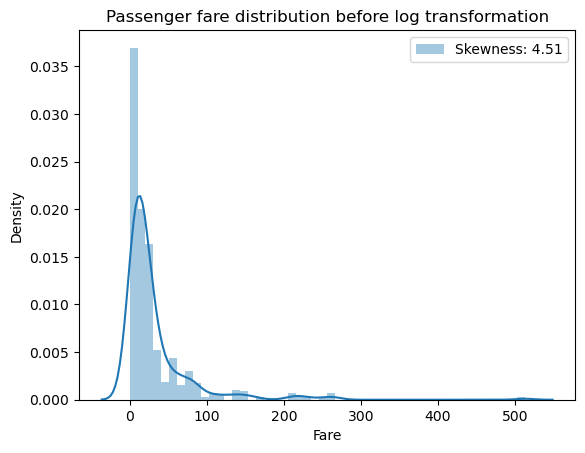

In [63]:
# fare distribution before the log transformation
sns.distplot(combine['Fare'], label=f"Skewness: {round(combine['Fare'].skew(), 2)}")
plt.legend(loc='best')
plt.title('Passenger fare distribution before log transformation');

In [64]:
combine['Fare'] = combine['Fare'].map(lambda x : np.log(x) if x > 0 else 0)

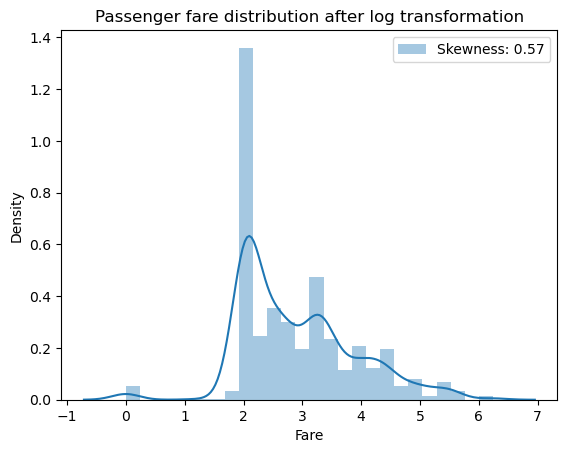

In [65]:
# fare distribution after the log transformation
sns.distplot(combine['Fare'], label=f"Skewness: {round(combine['Fare'].skew(), 2)}")
plt.legend(loc='best')
plt.title('Passenger fare distribution after log transformation');

# Note: skewnewss reduced from 4.51 to 0.57

## 5.3 Feature engineering

It is the process of creating new features from the existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on the unseen data.

### 5.3.1 Title

In [66]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [67]:
# get title from the names
combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]

In [68]:
combine['Title'].value_counts()

Title
Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [69]:
# number of unique titles
len(combine['Title'].unique())

18

In [70]:
combine['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [71]:
# simplify the titles
combine['Title'] = combine['Title'].replace(['Don', 'Rev', 'Dr',
       'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

In [72]:
combine['Title'].value_counts()

Title
Mr        753
Miss      259
Mrs       198
Master     60
Rare       29
Name: count, dtype: int64

In [73]:
combine['Title'] = combine['Title'].astype('category')

In [74]:
combine['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1294        Mr
1295      Rare
1296        Mr
1297        Mr
1298    Master
Name: Title, Length: 1299, dtype: category
Categories (5, object): ['Master', 'Miss', 'Mr', 'Mrs', 'Rare']

<Axes: xlabel='Title', ylabel='count'>

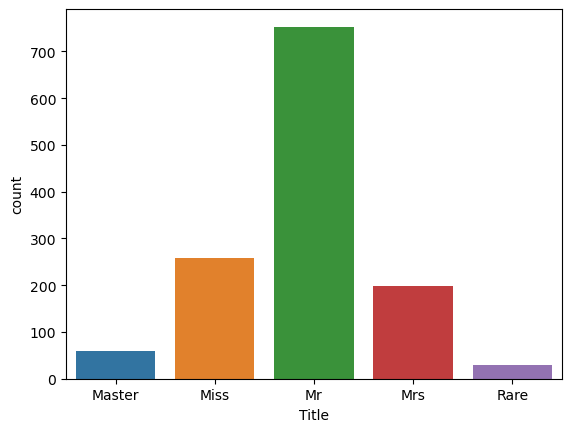

In [75]:
sns.countplot(data=combine, x='Title')

In [76]:
# get the survival rate (mean) by Title
combine[['Title', 'Survived']].groupby('Title', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0, 0.5, 'Survival probability')

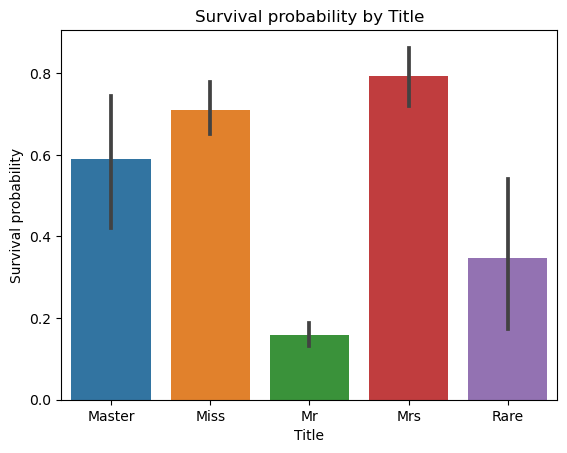

In [77]:
# get the survival plot by title
sns.barplot(x='Title', y='Survived', data=combine)
plt.title('Survival probability by Title')
plt.ylabel('Survival probability')

In [78]:
# drop the name columns
combine.drop('Name', axis=1, inplace=True)

In [79]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


In [80]:
combine.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
dtype: int64

### 5.3.2 IsAlone

In [81]:
# calculate family size from SibSp and Parch
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [82]:
# get the survival rate (mean) by FamilySize
combine[['FamilySize', 'Survived']].groupby('FamilySize').mean().sort_values(by='Survived', ascending=False)

# Note: Passengers with large FamilySize had more chances of survival

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.052632
8,0.000000
11,NaN


In [83]:
# create IsAlone feature
combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [84]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr,2,0
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs,2,0
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss,1,1
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs,2,0
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr,1,1


In [85]:
# get the survival rate (mean) by IsAlone
combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean().sort_values(by='Survived', ascending=False)

# Note: Passengers who were not alone had more chances of survival

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [86]:
# drop the SibSp, Parch and FamilySize column
combine.drop(['SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)

In [87]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


### 5.3.3 Age class

To create the Age class, we'll first transform Age into an ordinal variable. Ordinal variables are much like categorical variables but with intrinsic ordering in their values.

We'll separeate Ages into 5 separate bands and assign a number to each band.

In [88]:
# create age bands
combine['AgeBand'] = pd.cut(combine['Age'], 5)

In [89]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeBand
0,1,0.0,3,0,22.0,1.981001,S,Mr,0,"(16.136, 32.102]"
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0,"(32.102, 48.068]"
2,3,1.0,3,1,26.0,2.070022,S,Miss,1,"(16.136, 32.102]"
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0,"(32.102, 48.068]"
4,5,0.0,3,0,35.0,2.085672,S,Mr,1,"(32.102, 48.068]"


In [90]:
# get the survival rate (mean) by AgeBand
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='Survived', ascending=False)

# Note: passengers with less age had more chances of survival

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
3,"(48.068, 64.034]",0.434783
2,"(32.102, 48.068]",0.412844
1,"(16.136, 32.102]",0.339662
4,"(64.034, 80.0]",0.090909


In [91]:
# assign ordinal to each age band
combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[(combine['Age'] > 64.064) & (combine['Age'] <= 80.0), 'Age'] = 4

In [92]:
# drop the AgeBand column
combine.drop('AgeBand', axis=1, inplace=True)

In [93]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,1.0,1.981001,S,Mr,0
1,2,1.0,1,1,2.0,4.266662,C,Mrs,0
2,3,1.0,3,1,1.0,2.070022,S,Miss,1
3,4,1.0,1,1,2.0,3.972177,S,Mrs,0
4,5,0.0,3,0,2.0,2.085672,S,Mr,1


In [94]:
combine.tail()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
1294,1305,NaN,3,0,1.0,2.085672,S,Mr,1
1295,1306,NaN,1,1,2.0,4.690430,C,Rare,1
1296,1307,NaN,3,0,2.0,1.981001,S,Mr,1
1297,1308,NaN,3,0,1.0,2.085672,S,Mr,1
1298,1309,NaN,3,0,0.0,3.107198,C,Master,0


In [95]:
combine.dtypes

PassengerId       int64
Survived        float64
Pclass            int64
Sex               int64
Age             float64
Fare            float64
Embarked         object
Title          category
IsAlone           int64
dtype: object

In [96]:
# convert Age into integer
combine['Age'] = combine['Age'].astype('int')

In [97]:
combine.dtypes

PassengerId       int64
Survived        float64
Pclass            int64
Sex               int64
Age               int64
Fare            float64
Embarked         object
Title          category
IsAlone           int64
dtype: object

In [98]:
# create Age*Class feature
combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


## 5.4 Feature encoding

Feature encoding refers to the process of converting categorical data into a numerical format so that it can be used as input for machine learning algorithms. Categorical data represents variables that have a finite set of possible values, such as "gender" (male/female), "color" (red/blue/green), or "vehicle type" (car/truck/motorcycle). Machine learning algorithms typically require numerical inputs, so converting categorical data into numerical form is essential for many tasks.

In [99]:
combine.dtypes

PassengerId       int64
Survived        float64
Pclass            int64
Sex               int64
Age               int64
Fare            float64
Embarked         object
Title          category
IsAlone           int64
Age*Class         int64
dtype: object

In [100]:
# encode Title and Embarked column
combine = pd.get_dummies(combine, columns=['Title'], dtype=np.int64)
combine = pd.get_dummies(combine, columns=['Embarked'], prefix='Em', dtype=np.int64)

In [101]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [102]:
# divide Fare into 4 bands
combine['FareBand'] = pd.cut(combine['Fare'], 4)

In [103]:
# get the survival rate (mean) by FareBand
combine[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='Survived', ascending=False)

,FareBand,Survived
3,"(4.679, 6.239]",0.750000
2,"(3.119, 4.679]",0.517007
1,"(1.56, 3.119]",0.288719
0,"(-0.00624, 1.56]",0.062500


In [104]:
# assign ordinal to each fare band
combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[(combine['Fare'] > 4.679) & (combine['Fare'] <= 6.239), 'Fare'] = 3

In [105]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S,FareBand
0,1,0.0,3,0,1,1.0,0,3,0,0,1,0,0,0,0,1,"(1.56, 3.119]"
1,2,1.0,1,1,2,2.0,0,2,0,0,0,1,0,1,0,0,"(3.119, 4.679]"
2,3,1.0,3,1,1,1.0,1,3,0,1,0,0,0,0,0,1,"(1.56, 3.119]"
3,4,1.0,1,1,2,2.0,0,2,0,0,0,1,0,0,0,1,"(3.119, 4.679]"
4,5,0.0,3,0,2,1.0,1,6,0,0,1,0,0,0,0,1,"(1.56, 3.119]"


In [106]:
# drop FareBand column
combine.drop('FareBand', axis=1, inplace=True)

In [107]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.0,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2.0,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1.0,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2.0,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1.0,1,6,0,0,1,0,0,0,0,1


In [108]:
combine.dtypes

PassengerId       int64
Survived        float64
Pclass            int64
Sex               int64
Age               int64
Fare            float64
IsAlone           int64
Age*Class         int64
Title_Master      int64
Title_Miss        int64
Title_Mr          int64
Title_Mrs         int64
Title_Rare        int64
Em_C              int64
Em_Q              int64
Em_S              int64
dtype: object

In [109]:
combine.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age               0
Fare              0
IsAlone           0
Age*Class         0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Rare        0
Em_C              0
Em_Q              0
Em_S              0
dtype: int64

In [110]:
# convert Fare to int
combine['Fare'] = combine['Fare'].astype(int)

In [111]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [112]:
# separate train and test set from the combine dataset
train = combine[:len(train)]
test = combine[len(train):]

In [113]:
len(train)

881

In [114]:
len(test)

418

In [115]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [116]:
# convert survived column of train set into int
train['Survived'] = train['Survived'].astype(int)

In [117]:
train.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Sex             int64
Age             int64
Fare            int64
IsAlone         int64
Age*Class       int64
Title_Master    int64
Title_Miss      int64
Title_Mr        int64
Title_Mrs       int64
Title_Rare      int64
Em_C            int64
Em_Q            int64
Em_S            int64
dtype: object

In [118]:
# drop PassengerId from the train set
train.drop('PassengerId', axis=1, inplace=True)

In [119]:
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [120]:
# drop survived column from the test set, as survived is our target variable
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [121]:
test.drop('Survived', axis=1, inplace=True)

In [122]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


# 6. Modelling

Classifiers:

* Logistic regression
* Support vector machines
* K-nearest neighbors
* Gaussian naive bayes
* Perceptron
* Linear SVC
* Stochastic gradient descent
* Decision tree
* Random forest
* Cat boost

## 6.1 Split training data

In [123]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop('PassengerId', axis=1).copy()

In [124]:
X_train.shape, y_train.shape, X_test.shape

((881, 14), (881,), (418, 14))

In [125]:
X_test.head()

,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,3,1,1,1,0,3,0,0,0,1,0,0,0,1


## 6.2 Fit model to the data and make predictions

### 6.2.1 Logistic regression

In [126]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

80.93

### 6.2.2 Support vector machines

In [127]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.09

### 6.2.3 K-nearest neighbors

In [128]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100 , 2)
acc_knn

84.79

### 6.2.4 Gaussian naive bayes

In [129]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train, y_train) * 100 , 2)
acc_gnb

79.11

### 6.2.5 Perceptron

In [130]:
percp = Perceptron()
percp.fit(X_train, y_train)
Y_pred = percp.predict(X_test)
acc_percp = round(percp.score(X_train, y_train) * 100 , 2)
acc_percp

79.57

### 6.2.6 Linear SVC

In [131]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100 , 2)
acc_linear_svc

80.25

### 6.2.7 Stochastic gradient descent

In [132]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100 , 2)
acc_sgd

77.3

### 6.2.8 Decision tree

In [133]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100 , 2)
acc_decision_tree

85.7

### 6.2.9 Random forest

In [134]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100 , 2)
acc_random_forest

85.7

### 6.2.10 CatBoost

In [135]:
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, y_train) * 100 , 2)
acc_catboost

Learning rate set to 0.00976
0:	learn: 0.6868136	total: 63.1ms	remaining: 1m 3s
1:	learn: 0.6798485	total: 63.6ms	remaining: 31.7s
2:	learn: 0.6729520	total: 64ms	remaining: 21.3s
3:	learn: 0.6669729	total: 64.6ms	remaining: 16.1s
4:	learn: 0.6607853	total: 65.1ms	remaining: 13s
5:	learn: 0.6554568	total: 65.6ms	remaining: 10.9s
6:	learn: 0.6500727	total: 66.1ms	remaining: 9.38s
7:	learn: 0.6437982	total: 66.6ms	remaining: 8.26s
8:	learn: 0.6398272	total: 66.9ms	remaining: 7.37s
9:	learn: 0.6351628	total: 67.4ms	remaining: 6.67s
10:	learn: 0.6305969	total: 67.8ms	remaining: 6.09s
11:	learn: 0.6252274	total: 68.3ms	remaining: 5.62s
12:	learn: 0.6203165	total: 68.8ms	remaining: 5.22s
13:	learn: 0.6163249	total: 69.2ms	remaining: 4.87s
14:	learn: 0.6126752	total: 69.5ms	remaining: 4.56s
15:	learn: 0.6078515	total: 70ms	remaining: 4.3s
16:	learn: 0.6033553	total: 70.4ms	remaining: 4.07s
17:	learn: 0.5984437	total: 70.9ms	remaining: 3.87s
18:	learn: 0.5935188	total: 71.3ms	remaining: 3.68s


85.7

## 6.3 Model evaluation and hyperparameter tuning

### 6.3.1 Training accuracy

In [136]:
models = {
    'Model': [
        'Logistic regression', 
        'Support vector machines',
        'K-nearest neighbors', 
        'Gaussian naive bayes',
        'Perceptron',
        'Linear SVC',
        'Stochastic gradient descent',
        'Decision tree',
        'Random forest classifier',
        'CatBoost'
    ], 
    'Score': [
        acc_log,
        acc_svc,
        acc_knn, 
        acc_gnb, 
        acc_percp,
        acc_linear_svc, 
        acc_sgd, 
        acc_decision_tree, 
        acc_random_forest, 
        acc_catboost
    ]
}

models_df = pd.DataFrame(models)

models_df.sort_values(by='Score', ascending=False, ignore_index=True)

,Model,Score
0,Decision tree,85.70
1,Random forest classifier,85.70
2,CatBoost,85.70
3,K-nearest neighbors,84.79
4,Support vector machines,83.09
5,Logistic regression,80.93
6,Linear SVC,80.25
7,Perceptron,79.57
8,Gaussian naive bayes,79.11
9,Stochastic gradient descent,77.30


### 6.3.2 K-fold cross validation

K-fold cross-validation is a technique used in machine learning for assessing how well a model performs on a dataset. The dataset is divided into k subsets of approximately equal size, and the model is trained k times, each time using a different subset as the validation set and the remaining data as the training set. This allows for a more robust estimation of the model's performance compared to a single train-test split.

In [137]:
# create a list which contains classifiers
classifiers = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(), 
    Perceptron(),
    LinearSVC(),
    SGDClassifier(), 
    DecisionTreeClassifier(), 
    RandomForestClassifier(),
    CatBoostClassifier()
]

len(classifiers)

10

In [138]:
# create a list which contains results for each classifier
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=10))

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 1.58ms	remaining: 1.57s
1:	learn: 0.6803102	total: 2.08ms	remaining: 1.04s
2:	learn: 0.6743326	total: 2.54ms	remaining: 845ms
3:	learn: 0.6684760	total: 3.01ms	remaining: 749ms
4:	learn: 0.6624557	total: 3.45ms	remaining: 687ms
5:	learn: 0.6573314	total: 3.92ms	remaining: 649ms
6:	learn: 0.6520748	total: 4.35ms	remaining: 617ms
7:	learn: 0.6460856	total: 4.79ms	remaining: 594ms
8:	learn: 0.6422711	total: 5.13ms	remaining: 565ms
9:	learn: 0.6376840	total: 5.59ms	remaining: 553ms
10:	learn: 0.6326541	total: 6.12ms	remaining: 550ms
11:	learn: 0.6272334	total: 6.55ms	remaining: 540ms
12:	learn: 0.6224744	total: 6.95ms	remaining: 527ms
13:	learn: 0.6175199	total: 7.38ms	remaining: 519ms
14:	learn: 0.6124417	total: 7.8ms	remaining: 512ms
15:	learn: 0.6097890	total: 8.04ms	remaining: 494ms
16:	learn: 0.6050558	total: 8.55ms	remaining: 495ms
17:	learn: 0.6004952	total: 9.03ms	remaining: 493ms
18:	learn: 0.5958639	total: 9.48ms	remaining:

In [139]:
cv_results

[array([0.7752809 , 0.81818182, 0.75      , 0.86363636, 0.81818182,
        0.79545455, 0.78409091, 0.80681818, 0.81818182, 0.81818182]),
 array([0.83146067, 0.85227273, 0.73863636, 0.88636364, 0.84090909,
        0.78409091, 0.79545455, 0.78409091, 0.84090909, 0.86363636]),
 array([0.79775281, 0.80681818, 0.75      , 0.81818182, 0.85227273,
        0.79545455, 0.79545455, 0.82954545, 0.875     , 0.81818182]),
 array([0.76404494, 0.80681818, 0.72727273, 0.86363636, 0.77272727,
        0.78409091, 0.76136364, 0.72727273, 0.84090909, 0.78409091]),
 array([0.70786517, 0.78409091, 0.72727273, 0.70454545, 0.77272727,
        0.73863636, 0.73863636, 0.70454545, 0.64772727, 0.80681818]),
 array([0.78651685, 0.80681818, 0.75      , 0.86363636, 0.79545455,
        0.78409091, 0.77272727, 0.77272727, 0.84090909, 0.82954545]),
 array([0.7752809 , 0.82954545, 0.77272727, 0.86363636, 0.79545455,
        0.72727273, 0.82954545, 0.72727273, 0.80681818, 0.82954545]),
 array([0.76404494, 0.79545455, 0.

In [140]:
# mean and standard deviation of cross validation results for each classifier
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [141]:
cv_res = pd.DataFrame(
    {
        'Cross validation mean': cv_mean,
        'Cross validation std': cv_std,
        'Algorithm': [
        'Logistic regression', 
        'Support vector machines',
        'K-nearest neighbors', 
        'Gaussian naive bayes',
        'Perceptron',
        'Linear SVC',
        'Stochastic gradient descent',
        'Decision tree',
        'Random forest classifier',
        'CatBoost'
    ]
    }
)

cv_res.sort_values(by='Cross validation mean', ascending=False, ignore_index=True)

# Note: Support vector machines is the best performing model

,Cross validation mean,Cross validation std,Algorithm
0,0.821782,0.042574,Support vector machines
1,0.815028,0.036378,CatBoost
2,0.813866,0.032499,K-nearest neighbors
3,0.804801,0.029279,Logistic regression
4,0.800268,0.031089,Random forest classifier
5,0.800243,0.033294,Linear SVC
6,0.795710,0.042994,Stochastic gradient descent
7,0.787768,0.025679,Decision tree
8,0.783223,0.041915,Gaussian naive bayes
9,0.733287,0.043881,Perceptron


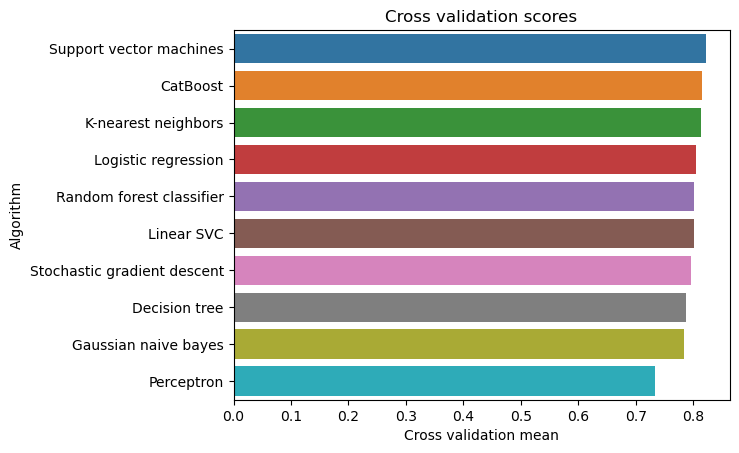

In [142]:
# get the plot of the models scores
cv_res_sorted = cv_res.sort_values(by='Cross validation mean', ascending=False)
sns.barplot(x='Cross validation mean', y='Algorithm', data=cv_res_sorted)
plt.title('Cross validation scores');

# Note: Support vector machines is the best performing model

### 6.3.3 Hyperparameter tuning for SVM

Hyperparameter tuning is a critical step in the process of training machine learning models. In essence, it involves finding the optimal configuration of hyperparameters for a given machine learning algorithm. Hyperparameters are parameters that are set prior to the training process and are not learned from the data, unlike model parameters.

* Here's a general process for hyperparameter tuning:

1. Define Hyperparameters: Identify the hyperparameters of your machine learning algorithm that need to be tuned. These could include parameters like learning rate, regularization strength, tree depth in decision trees, etc.

2. Choose a Search Space: Determine the range of values each hyperparameter can take. This could be done manually or automatically generated.

3. Select a Search Method: There are various methods to search the hyperparameter space, including grid search, random search, Bayesian optimization, genetic algorithms, etc. The choice often depends on the size of the search space and computational resources available.

4. Define Evaluation Metric: Choose an appropriate metric to evaluate the performance of your model. This could be accuracy, precision, recall, F1 score, mean squared error, etc., depending on the problem you're solving.

5. Perform Hyperparameter Search: Execute the chosen search method to explore the hyperparameter space. This involves training multiple models with different hyperparameter configurations and evaluating their performance using the chosen evaluation metric.

6. Select the Best Configuration: Once the search is complete, select the hyperparameter configuration that yields the best performance on the validation set.

7. Evaluate on Test Set: Finally, evaluate the performance of the selected model configuration on a separate test set to obtain an unbiased estimate of its performance.

8. Iterate if Necessary: Depending on the results, you may need to iterate on the hyperparameter tuning process, adjusting the search space or method, and repeating steps 4-7 until satisfactory performance is achieved.

In [143]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid = GridSearchCV(
    SVC(), 
    param_grid,
    refit=True,
    verbose=3
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [144]:
print(f'Best parameters: {grid.best_params_}')
print(f'Best estimator: {grid.best_estimator_}')

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator: SVC(C=100, gamma=0.01)


In [145]:
# training accuracy
svc = SVC(C=100, gamma=0.01, kernel='rbf')
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.54

In [146]:
# mean cross validation score
cross_val_score(svc, X_train, y_train, scoring='accuracy', cv=10).mean()

0.8297242083758938

In [147]:
len(Y_pred)

418

# 7. Preparing data for submission

In [148]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [149]:
# create submission DataFrame
submit = pd.DataFrame(
    {
        'PassengerId': test['PassengerId'],
        'Survived': Y_pred
    }
)

submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [152]:
# make sure our dataframe has same shape as the sample submission
ss.shape, submit.shape

((418, 2), (418, 2))

In [151]:
# create a csv file
submit.to_csv('titanic/svm_titanic.csv', index=False)